In [42]:
import numpy as np

In [43]:
vr = np.array([0.07025444373403009, 0.14139327496887916, 0.21341649370454718,  
      0.2863240999410342, 0.3601160936783402, 0.43479247491646505,  
      0.510353243655409, 0.5867983998951719, 0.6641279436357537,  
      0.7423418748771545, 0.8214401936193743, 0.901422899862413,  
      0.9822899936062708, 1.0640414748509475, 1.146677343596443,  
      1.230197599842758, 1.3146022435898914, 1.3998912748378438,  
      1.4860646935866155, 1.5731224998362061, 1.6610646935866153,  
      1.749891274837844, 1.8396022435898913, 1.9301975998427576,  
      2.0216773435964432, 2.1140414748509473, 2.207289993606271,  
      2.301422899862413, 2.396440193619374, 2.4923418748771544,  
      2.5891279436357535, 2.6867983998951717, 2.785353243655409,  
      2.8847924749164653, 2.9851160936783403, 3.086324099941034,  
      3.1884164937045467, 3.291393274968879, 3.39525444373403, 3.5]
)
vx =np.array([-3.5, -3.39525444373403, -3.291393274968879, -3.1884164937045467,  
      -3.086324099941034, -2.9851160936783403, -2.8847924749164653,  
      -2.785353243655409, -2.6867983998951717, -2.5891279436357535,  
      -2.4923418748771544, -2.396440193619374, -2.301422899862413,  
      -2.207289993606271, -2.1140414748509473, -2.0216773435964432,  
      -1.9301975998427576, -1.8396022435898913, -1.749891274837844,  
      -1.6610646935866153, -1.5731224998362061, -1.4860646935866155,  
      -1.3998912748378438, -1.3146022435898914, -1.230197599842758,  
      -1.146677343596443, -1.0640414748509475, -0.9822899936062708,  
      -0.901422899862413, -0.8214401936193743, -0.7423418748771545,  
      -0.6641279436357537, -0.5867983998951719, -0.510353243655409,  
      -0.43479247491646505, -0.3601160936783402, -0.2863240999410342,  
      -0.21341649370454718, -0.14139327496887916, -0.07025444373403009,  
      0.07025444373403009, 0.14139327496887916, 0.21341649370454718,  
      0.2863240999410342, 0.3601160936783402, 0.43479247491646505,  
      0.510353243655409, 0.5867983998951719, 0.6641279436357537,  
      0.7423418748771545, 0.8214401936193743, 0.901422899862413,  
      0.9822899936062708, 1.0640414748509475, 1.146677343596443,  
      1.230197599842758, 1.3146022435898914, 1.3998912748378438,  
      1.4860646935866155, 1.5731224998362061, 1.6610646935866153,  
      1.749891274837844, 1.8396022435898913, 1.9301975998427576,  
      2.0216773435964432, 2.1140414748509473, 2.207289993606271,  
      2.301422899862413, 2.396440193619374, 2.4923418748771544,  
      2.5891279436357535, 2.6867983998951717, 2.785353243655409,  
      2.8847924749164653, 2.9851160936783403, 3.086324099941034,  
      3.1884164937045467, 3.291393274968879, 3.39525444373403, 3.5])

In [44]:
# Make_dVr_dVx
#   Constructs velocity space differentials for distrobution functions 
# used by Kinetic_Neutrals, Kinetic_H2, Kinetic_H, and other related
# procedures 
#
# Gwendolyn Galleher 

import numpy as np

def Make_dVr_dVx(Vr, Vx): # For this to work inputs must be np arrays so I might need to ammend this later to make sure all inputs are arrays
    # Determine velocity space differentials 
    nVr = np.size(Vr)
    nVx = np.size(Vx)

    # for Vr first 
    _Vr = np.concatenate([Vr, [2 * Vr[nVr-1] - Vr[nVr-2]]])  # this is an array and Vr(nVr-1) is calling the last cell of Vr
    Vr_mid = np.concatenate([[0.0], 0.5 * (_Vr + np.roll(_Vr, -1))]) # changed to np.concatenate - nh
    
    VrR = np.roll(Vr_mid, -1)
    VrL = Vr_mid

    Vr2pidVr = np.pi * ((VrR ** 2) - (VrL ** 2))
    Vr2pidVr = Vr2pidVr[0 : nVr]  # makes it the same length as Vr 

    VrVr4pidVr = (4/3) * np.pi * ((VrR ** 3) - (VrL ** 3))
    VrVr4pidVr = VrVr4pidVr[0 : nVr]
    VrR = VrR[0 : nVr]
    VrL = VrL[0 : nVr] 

    # now for Vx
    _Vx = np.concatenate([[2 * Vx[0] - Vx[1]], Vx, [2 * Vx[nVx - 1] - Vx[nVx - 2]]]) # changed to np.concatenate - nh
    VxR = 0.5 * (np.roll(_Vx, -1) + _Vx)
    VxL = 0.5 * (np.roll(_Vx, 1) + _Vx)
    dVx = VxR[1: nVx+1] - VxL[1:nVx+1]
    VxR = VxR[1: nVx+1]
    VxL = VxL[1 : nVx+1]

    # compute volume elements 
    vol = np.zeros((nVx, nVr), float)
    for i in range(0, nVr):
        vol[:,i] = Vr2pidVr[i] * dVx # fixed minor indexing bugs - nh
    print('vol: ',vol.shape, type(vol))
    #compute DeltaVx, DeltaVr
    DeltaVx = VxR - VxL
    DeltaVr = VrR - VrL

    # compute vth_Deltavx, vx_Deltavx, vr_Deltavr, padded with zeros
    Vth_DeltaVx = np.zeros((nVx + 2, nVr + 2), float)
    Vx_DeltaVx = np.zeros((nVx + 2, nVr + 2), float)
    Vr_DeltaVr = np.zeros((nVx + 2, nVr + 2), float) # replaced np.array with np.zeros - nh
    for i in range(1, nVr+1):
        Vth_DeltaVx[1 : nVx+1,i] = 1.0/DeltaVx
        Vx_DeltaVx[1 : nVx+1,i] = Vx/DeltaVx
    for j in range(1, nVx+1):
        Vr_DeltaVr[j,1 : nVr+1] = Vr/DeltaVr 
    
    #compute v^2
    Vr2Vx2 = np.zeros((nVx, nVr), float)
    for i in range(0, nVr):
        Vr2Vx2[:,i] = (Vr[i] ** 2) + (Vx ** 2)

    # Determine indice range of positive and negative Vx 
    jpa=jpb=jna=jnb=-1
    jp = np.argwhere(Vx > 0)
    if jp.size>0:
        jpa = jp[0][0]; jpb = jp[np.size(jp) - 1][0]
    jn = np.argwhere(Vx < 0)
    if jn.size>0:
        jna = jn[0][0]; jnb = jn[np.size(jn) - 1][0] # modified section to return -1 if jp or jn is empty (previously this raised an error) - nh
    
    # changed return line to provide an output as a list - nh
    return vol
    # return Vr2pidVr,VrVr4pidVr,dVx,VrL,VrR,VxL,VxR,vol,Vth_DeltaVx,Vx_DeltaVx,Vr_DeltaVr,Vr2Vx2,jpa,jpb,jna,jnb


In [45]:
vol = Make_dVr_dVx(vr, vx)

vol:  (80, 40) <class 'numpy.ndarray'>


In [46]:
vol

array([[0.00368513, 0.00667146, 0.01018882, ..., 0.22403953, 0.23308504,
        0.24127878],
       [0.00366957, 0.00664329, 0.01014581, ..., 0.22309373, 0.23210104,
        0.2402602 ],
       [0.00363846, 0.00658696, 0.01005978, ..., 0.22120212, 0.23013306,
        0.23822303],
       ...,
       [0.00363846, 0.00658696, 0.01005978, ..., 0.22120212, 0.23013306,
        0.23822303],
       [0.00366957, 0.00664329, 0.01014581, ..., 0.22309373, 0.23210104,
        0.2402602 ],
       [0.00368513, 0.00667146, 0.01018882, ..., 0.22403953, 0.23308504,
        0.24127878]])

# Start of the debugging

In [114]:
# Definir vr y vx
vr = np.array([0.07025444373403009, 0.14139327496887916, 0.21341649370454718, 
               0.2863240999410342, 0.3601160936783402, 0.43479247491646505, 
               0.510353243655409, 0.5867983998951719, 0.6641279436357537, 
               0.7423418748771545, 0.8214401936193743, 0.901422899862413, 
               0.9822899936062708, 1.0640414748509475, 1.146677343596443, 
               1.230197599842758, 1.3146022435898914, 1.3998912748378438, 
               1.4860646935866155, 1.5731224998362061, 1.6610646935866153, 
               1.749891274837844, 1.8396022435898913, 1.9301975998427576, 
               2.0216773435964432, 2.1140414748509473, 2.207289993606271, 
               2.301422899862413, 2.396440193619374, 2.4923418748771544, 
               2.5891279436357535, 2.6867983998951717, 2.785353243655409, 
               2.8847924749164653, 2.9851160936783403, 3.086324099941034, 
               3.1884164937045467, 3.291393274968879, 3.39525444373403, 3.5])

vx = np.array([-3.5, -3.39525444373403, -3.291393274968879, -3.1884164937045467, 
               -3.086324099941034, -2.9851160936783403, -2.8847924749164653, 
               -2.785353243655409, -2.6867983998951717, -2.5891279436357535, 
               -2.4923418748771544, -2.396440193619374, -2.301422899862413, 
               -2.207289993606271, -2.1140414748509473, -2.0216773435964432, 
               -1.9301975998427576, -1.8396022435898913, -1.749891274837844, 
               -1.6610646935866153, -1.5731224998362061, -1.4860646935866155, 
               -1.3998912748378438, -1.3146022435898914, -1.230197599842758, 
               -1.146677343596443, -1.0640414748509475, -0.9822899936062708, 
               -0.901422899862413, -0.8214401936193743, -0.7423418748771545, 
               -0.6641279436357537, -0.5867983998951719, -0.510353243655409, 
               -0.43479247491646505, -0.3601160936783402, -0.2863240999410342, 
               -0.21341649370454718, -0.14139327496887916, -0.07025444373403009, 
               0.07025444373403009, 0.14139327496887916, 0.21341649370454718, 
               0.2863240999410342, 0.3601160936783402, 0.43479247491646505, 
               0.510353243655409, 0.5867983998951719, 0.6641279436357537, 
               0.7423418748771545, 0.8214401936193743, 0.901422899862413, 
               0.9822899936062708, 1.0640414748509475, 1.146677343596443, 
               1.230197599842758, 1.3146022435898914, 1.3998912748378438, 
               1.4860646935866155, 1.5731224998362061, 1.6610646935866153, 
               1.749891274837844, 1.8396022435898913, 1.9301975998427576, 
               2.0216773435964432, 2.1140414748509473, 2.207289993606271, 
               2.301422899862413, 2.396440193619374, 2.4923418748771544, 
               2.5891279436357535, 2.6867983998951717, 2.785353243655409, 
               2.8847924749164653, 2.9851160936783403, 3.086324099941034, 
               3.1884164937045467, 3.291393274968879, 3.39525444373403, 3.5])

# IDL> help, vol 
# VOL             DOUBLE    = Array[40, 80]


print(vr.shape)

(40,)


In [133]:
import copy
from tqdm import tqdm

In [ ]:
import math

In [153]:
def Make_dVr_dVx(vr,vx):
    # nvr & nvx are taking the shape of vr & vx respectively
    nvr = vr.size
    nvx = vx.size

    # Calculations for r-dimension
    _vr     = np.append(vr, 2 * vr[-1] - vr[-2])
    vr_mid  = np.concatenate(([0.0], 0.5 * (_vr + np.roll(_vr, -1))))

    vrR = np.roll(vr_mid, -1)[0:nvr]
    vrL = copy.copy(vr_mid)[0:nvr]

    Vr2pidVr    =         np.pi * (vrR**2 - vrL**2)
    VrVr4pidVr  = (4/3) * np.pi * (vrR**3 - vrL**3)

    # Calculations for x-dimension
    _vx = np.concatenate(([2 * vx[0] - vx[1]], vx, [2 * vx[-1] - vx[-2]]))

    vxR = 0.5 * (np.roll(_vx, -1) + _vx)[1:nvx+1]
    vxL = 0.5 * (np.roll(_vx,  1) + _vx)[1:nvx+1]

    dVx = vxR - vxL

    # Calc. volumen
    vol = np.zeros((nvr, nvx), dtype=np.float64)
    for i in tqdm(range(nvr), desc=f"Make_dVr_dVx: calc. vol"): ########################################################### guardar el nombre de la función
        vol[i, :] = Vr2pidVr[i] * dVx
        
    Deltavx = vxR - vxL
    Deltavr = vrR - vrL

    vth_Deltavx =np.zeros((nvr+2,nvx+2))
    vx_Deltavx  =np.zeros((nvr+2,nvx+2))
    vr_Deltavr  =np.zeros((nvr+2,nvx+2))

    for j in tqdm(range(1,nvr+1),desc=f"Make_dVr_dVx: "):
        vth_Deltavx[j,1:nvx+1] = 1.0/Deltavx    # vth_Deltavx(i,1:nvx)=1.0/Deltavx
        vx_Deltavx[ j,1:nvx+1] = vx/Deltavx     # vx_Deltavx(i,1:nvx)=vx/Deltavx
    return nvr,vx_Deltavx

nvr,vx_Deltavx = Make_dVr_dVx(vr,vx)
print(vx_Deltavx.shape)

Make_dVr_dVx: calc. vol: 100%|██████████| 40/40 [00:00<00:00, 39728.19it/s]

(42, 82)


In [128]:
vxR_list = [
    -3.4476271, -3.3433237, -3.2399049, -3.1373703, -3.0357201, -2.9349542,
    -2.8350730, -2.7360759, -2.6379633, -2.5407348, -2.4443910, -2.3489316,
    -2.2543564, -2.1606658, -2.0678594, -1.9759374, -1.8848999, -1.7947468,
    -1.7054780, -1.6170936, -1.5295936, -1.4429779, -1.3572468, -1.2723999,
    -1.1884375, -1.1053594, -1.0231657, -0.94185644, -0.86143160, -0.78189105,
    -0.70323491, -0.62546319, -0.54857588, -0.47257286, -0.39745429, -0.32322010,
    -0.24987030, -0.17740488, -0.10582386, 0.0000000, 0.10582386, 0.17740488,
    0.24987030, 0.32322010, 0.39745429, 0.47257286, 0.54857588, 0.62546319,
    0.70323491, 0.78189105, 0.86143160, 0.94185644, 1.0231657, 1.1053594,
    1.1884375, 1.2723999, 1.3572468, 1.4429779, 1.5295936, 1.6170936,
    1.7054780, 1.7947468, 1.8848999, 1.9759374, 2.0678594, 2.1606658,
    2.2543564, 2.3489316, 2.4443910, 2.5407348, 2.6379633, 2.7360759,
    2.8350730, 2.9349542, 3.0357201, 3.1373703, 3.2399049, 3.3433237,
    3.4476271, 3.5523729
]
vxR-vxR_list

array([-1.21867015e-07, -1.59351455e-07,  1.56632871e-08,  3.17721005e-09,
        3.19031290e-09, -8.42974028e-08,  1.40714063e-07,  7.82247098e-08,
        1.28234538e-07, -1.09256454e-07, -3.42482642e-08,  5.32591060e-08,
       -4.67343422e-08,  6.57713906e-08, -9.22369514e-09, -7.17196003e-08,
       -2.17163245e-08,  4.07861322e-08,  1.57877704e-08,  3.28858940e-09,
        3.28858940e-09, -8.42122296e-08,  4.07861322e-08, -2.17163247e-08,
        2.82803996e-08, -9.22369536e-09, -3.42286091e-08, -6.73434186e-09,
        5.32591063e-08,  1.57517357e-08,  7.43546003e-10,  1.82345371e-08,
        5.82247095e-08,  7.14062920e-10,  5.70259739e-09,  3.19031279e-09,
        3.17720930e-09, -4.33671318e-09,  6.48545384e-10,  0.00000000e+00,
       -6.48545384e-10,  4.33671318e-09, -3.17720930e-09, -3.19031279e-09,
       -5.70259739e-09, -7.14062920e-10, -5.82247095e-08, -1.82345371e-08,
       -7.43546003e-10, -1.57517357e-08, -5.32591063e-08,  6.73434186e-09,
        3.42286091e-08,  

In [129]:
vxL_list = [
    -3.5523729, -3.4476271, -3.3433237, -3.2399049, -3.1373703, -3.0357201,
    -2.9349542, -2.8350730, -2.7360759, -2.6379633, -2.5407348, -2.4443910,
    -2.3489316, -2.2543564, -2.1606658, -2.0678594, -1.9759374, -1.8848999,
    -1.7947468, -1.7054780, -1.6170936, -1.5295936, -1.4429779, -1.3572468,
    -1.2723999, -1.1884375, -1.1053594, -1.0231657, -0.94185644, -0.86143160,
    -0.78189105, -0.70323491, -0.62546319, -0.54857588, -0.47257286, -0.39745429,
    -0.32322010, -0.24987030, -0.17740488, -0.10582386, 0.0000000, 0.10582386,
    0.17740488, 0.24987030, 0.32322010, 0.39745429, 0.47257286, 0.54857588,
    0.62546319, 0.70323491, 0.78189105, 0.86143160, 0.94185644, 1.0231657,
    1.1053594, 1.1884375, 1.2723999, 1.3572468, 1.4429779, 1.5295936,
    1.6170936, 1.7054780, 1.7947468, 1.8848999, 1.9759374, 2.0678594,
    2.1606658, 2.2543564, 2.3489316, 2.4443910, 2.5407348, 2.6379633,
    2.7360759, 2.8350730, 2.9349542, 3.0357201, 3.1373703, 3.2399049,
    3.3433237, 3.4476271
]
vxL-vxL_list


array([ 1.21867015e-07, -1.21867015e-07, -1.59351455e-07,  1.56632871e-08,
        3.17721005e-09,  3.19031290e-09, -8.42974028e-08,  1.40714063e-07,
        7.82247098e-08,  1.28234538e-07, -1.09256454e-07, -3.42482642e-08,
        5.32591060e-08, -4.67343422e-08,  6.57713906e-08, -9.22369514e-09,
       -7.17196003e-08, -2.17163245e-08,  4.07861322e-08,  1.57877704e-08,
        3.28858940e-09,  3.28858940e-09, -8.42122296e-08,  4.07861322e-08,
       -2.17163247e-08,  2.82803996e-08, -9.22369536e-09, -3.42286091e-08,
       -6.73434186e-09,  5.32591063e-08,  1.57517357e-08,  7.43546003e-10,
        1.82345371e-08,  5.82247095e-08,  7.14062920e-10,  5.70259739e-09,
        3.19031279e-09,  3.17720930e-09, -4.33671318e-09,  6.48545384e-10,
        0.00000000e+00, -6.48545384e-10,  4.33671318e-09, -3.17720930e-09,
       -3.19031279e-09, -5.70259739e-09, -7.14062920e-10, -5.82247095e-08,
       -1.82345371e-08, -7.43546003e-10, -1.57517357e-08, -5.32591063e-08,
        6.73434186e-09,  

In [118]:
vx_list = [
    -3.6047456, -3.5000000, -3.3952544, -3.2913933, -3.1884165, -3.0863242,
    -2.9851160, -2.8847926, -2.7853532, -2.6867983, -2.5891280, -2.4923418,
    -2.3964403, -2.3014228, -2.2072899, -2.1140416, -2.0216773, -1.9301976,
    -1.8396022, -1.7498913, -1.6610647, -1.5731225, -1.4860647, -1.3998913,
    -1.3146023, -1.2301975, -1.1466774, -1.0640415, -0.98228997, -0.90142292,
    -0.82144022, -0.74234188, -0.66412795, -0.58679843, -0.51035327, -0.43479249,
    -0.36011609, -0.28632411, -0.21341649, -0.14139327, -0.070254445, 0.070254445,
    0.14139327, 0.21341649, 0.28632411, 0.36011609, 0.43479249, 0.51035327,
    0.58679843, 0.66412795, 0.74234188, 0.82144022, 0.90142292, 0.98228997,
    1.0640415, 1.1466774, 1.2301975, 1.3146023, 1.3998913, 1.4860647,
    1.5731225, 1.6610647, 1.7498913, 1.8396022, 1.9301976, 2.0216773,
    2.1140416, 2.2072899, 2.3014228, 2.3964403, 2.4923418, 2.5891280,
    2.6867983, 2.7853532, 2.8847926, 2.9851160, 3.0863242, 3.1884165,
    3.2913933, 3.3952544, 3.5000000, 3.6047456
]
_vx-vx_list

array([ 4.37340302e-08,  0.00000000e+00, -4.37340302e-08,  2.50311212e-08,
        6.29545349e-09,  1.00058966e-07, -9.36783402e-08,  1.25083535e-07,
       -4.36554091e-08, -9.98951717e-08,  5.63642466e-08, -7.48771543e-08,
        1.06380626e-07, -9.98624130e-08, -9.36062707e-08,  1.25149053e-07,
       -4.35964433e-08,  1.57242441e-10, -4.35898913e-08,  2.51621561e-08,
        6.41338471e-09,  1.63793867e-10,  6.41338449e-09,  2.51621561e-08,
        5.64101086e-08, -9.98427578e-08,  5.64035569e-08,  2.51490526e-08,
       -2.36062708e-08,  2.01375870e-08,  2.63806258e-08,  5.12284548e-09,
        6.36424635e-09,  3.01048281e-08,  2.63445910e-08,  1.50835349e-08,
       -3.67834019e-09,  1.00589658e-08, -3.70454720e-09, -4.96887917e-09,
        1.26596991e-09, -1.26596991e-09,  4.96887917e-09,  3.70454720e-09,
       -1.00589658e-08,  3.67834019e-09, -1.50835349e-08, -2.63445910e-08,
       -3.01048281e-08, -6.36424635e-09, -5.12284548e-09, -2.63806258e-08,
       -2.01375870e-08,  

In [112]:
vrR_list = [
    0.10582386, 0.17740488, 0.24987030, 0.32322010, 0.39745429, 0.47257286,
    0.54857588, 0.62546319, 0.70323491, 0.78189105, 0.86143160, 0.94185644,
    1.0231657, 1.1053594, 1.1884375, 1.2723999, 1.3572468, 1.4429779,
    1.5295936, 1.6170936, 1.7054780, 1.7947468, 1.8848999, 1.9759374,
    2.0678594, 2.1606658, 2.2543564, 2.3489316, 2.4443910, 2.5407348,
    2.6379633, 2.7360759, 2.8350730, 2.9349542, 3.0357201, 3.1373703,
    3.2399049, 3.3433237, 3.4476271, 3.5523729
]
vrR-vrR_list

array([-6.48545384e-10,  4.33671318e-09, -3.17720930e-09, -3.19031279e-09,
       -5.70259739e-09, -7.14062920e-10, -5.82247095e-08, -1.82345371e-08,
       -7.43546003e-10, -1.57517357e-08, -5.32591063e-08,  6.73434186e-09,
        3.42286091e-08,  9.22369536e-09, -2.82803996e-08,  2.17163247e-08,
       -4.07861322e-08,  8.42122296e-08, -3.28858940e-09, -3.28858940e-09,
       -1.57877704e-08, -4.07861322e-08,  2.17163245e-08,  7.17196003e-08,
        9.22369514e-09, -6.57713906e-08,  4.67343422e-08, -5.32591060e-08,
        3.42482642e-08,  1.09256454e-07, -1.28234538e-07, -7.82247098e-08,
       -1.40714063e-07,  8.42974028e-08, -3.19031290e-09, -3.17721005e-09,
       -1.56632871e-08,  1.59351455e-07,  1.21867015e-07, -1.21867015e-07])

In [89]:
np.roll(vr_mid, -1),np.roll(vr_mid, -1).shape

(array([0.10582386, 0.17740488, 0.2498703 , 0.3232201 , 0.39745428,
        0.47257286, 0.54857582, 0.62546317, 0.70323491, 0.78189103,
        0.86143155, 0.94185645, 1.02316573, 1.10535941, 1.18843747,
        1.27239992, 1.35724676, 1.44297798, 1.5295936 , 1.6170936 ,
        1.70547798, 1.79474676, 1.88489992, 1.97593747, 2.06785941,
        2.16066573, 2.25435645, 2.34893155, 2.44439103, 2.54073491,
        2.63796317, 2.73607582, 2.83507286, 2.93495428, 3.0357201 ,
        3.1373703 , 3.23990488, 3.34332386, 3.44762722, 3.55237278,
        1.8375    , 0.        ]),
 (42,))

In [91]:
np.roll(vr_mid, -1)[:-2]

array([0.10582386, 0.17740488, 0.2498703 , 0.3232201 , 0.39745428,
       0.47257286, 0.54857582, 0.62546317, 0.70323491, 0.78189103,
       0.86143155, 0.94185645, 1.02316573, 1.10535941, 1.18843747,
       1.27239992, 1.35724676, 1.44297798, 1.5295936 , 1.6170936 ,
       1.70547798, 1.79474676, 1.88489992, 1.97593747, 2.06785941,
       2.16066573, 2.25435645, 2.34893155, 2.44439103, 2.54073491,
       2.63796317, 2.73607582, 2.83507286, 2.93495428, 3.0357201 ,
       3.1373703 , 3.23990488, 3.34332386, 3.44762722, 3.55237278])

In [ ]:
IDL> VrR
      0.10582386      0.17740488      0.24987030      0.32322010      0.39745429      0.47257286      0.54857588      0.62546319      0.70323491      0.78189105      0.86143160
      0.94185644       1.0231657       1.1053594       1.1884375       1.2723999       1.3572468       1.4429779       1.5295936       1.6170936       1.7054780       1.7947468
       1.8848999       1.9759374       2.0678594       2.1606658       2.2543564       2.3489316       2.4443910       2.5407348       2.6379633       2.7360759       2.8350730
       2.9349542       3.0357201       3.1373703       3.2399049       3.3433237       3.4476271       3.5523729
IDL> SIZE(VrR)
           1          40           4          40

In [48]:
# Import values from IDL version
# Only for validation purpouses
# we're looking for the min & max errors
vol_sp = np.loadtxt('vol.txt')
vol_sp = vol_sp.reshape((40,80))
vol_db = np.loadtxt('output.dat')
vol_db = vol_db.reshape((40,80))

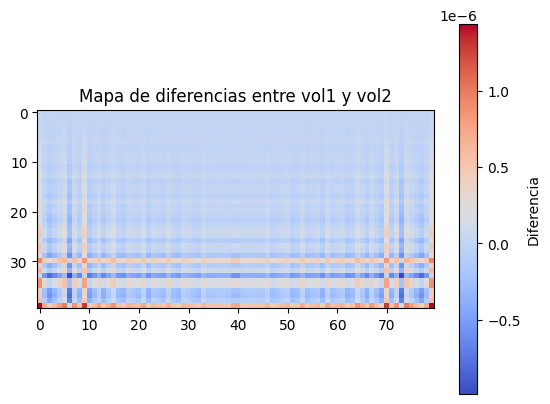

In [73]:
import numpy as np
import matplotlib.pyplot as plt

diferencia = vol_db -vol
diferencia_absoluta = np.abs(diferencia)
# print(diferencia_absoluta)

# Visualizar las diferencias con un mapa de calor
plt.imshow(diferencia, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Diferencia')
plt.title("Mapa de diferencias entre vol1 y vol2")
plt.show()
